In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
from wordcloud import WordCloud
#from sklearnmetrics import precision_recall_curve
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string


In [2]:
# Load the dataset
df = pd.read_csv(r'C:\Users\fofoh\Desktop\Oumaima\p2\Spam.csv')

# Check the first few rows
df.head()


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    # Remove punctuation
    text = "".join([char for char in text if char not in string.punctuation])
    # Lowercase the text
    text = text.lower()
    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

# Apply the preprocessing function
df['clean_text'] = df['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fofoh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Splitting the Data
Split the dataset into training and testing sets (80% training, 20% testing).

In [5]:
X = df['clean_text']
y = df['label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Vectorization (TF-IDF)
Convert the text into numerical data using TF-IDF Vectorization

In [7]:
# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=3000)

# Transform the training and test data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


Raining the Model (Naive Bayes)
We’ll use a Multinomial Naive Bayes classifier, which is commonly used for text classification.

In [9]:
# Initialize the Naive Bayes model
model = MultinomialNB()

# Train the model
model.fit(X_train_tfidf, y_train)


MultinomialNB()

Model Evaluation
Test the model’s performance using accuracy, confusion matrix, and classification report

In [11]:
# Predict on the test data
y_pred = model.predict(X_test_tfidf)


In [12]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 94.30%


In [13]:
# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         ham       0.97      0.95      0.96       742
        spam       0.88      0.92      0.90       293

    accuracy                           0.94      1035
   macro avg       0.93      0.94      0.93      1035
weighted avg       0.94      0.94      0.94      1035



In [14]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

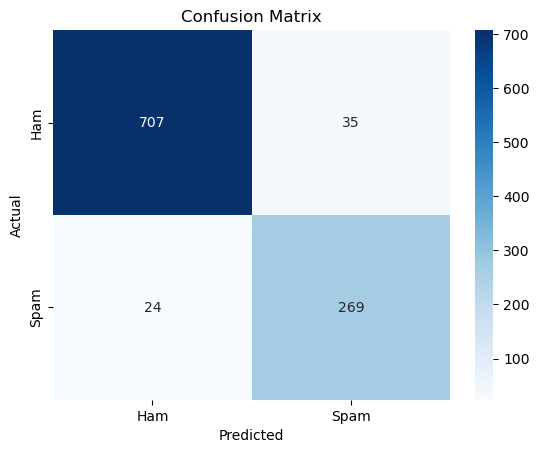

In [15]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

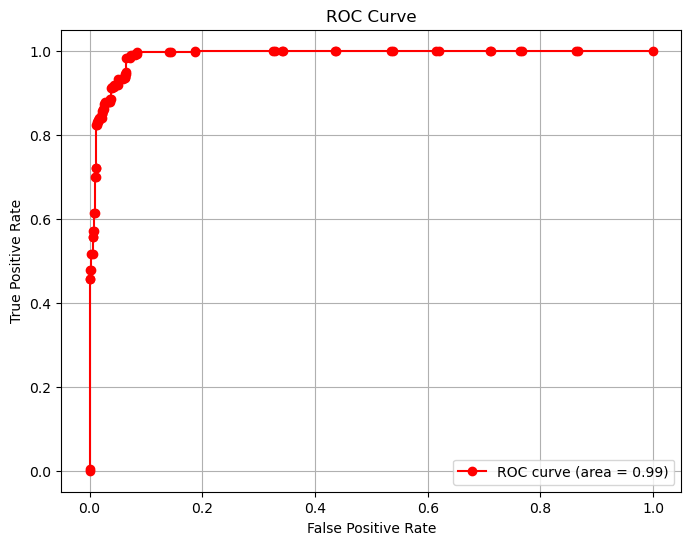

In [17]:

# Calculate ROC curve values
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_tfidf)[:,1], pos_label='spam')
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_tfidf)[:,1])

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='o', color='r', label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


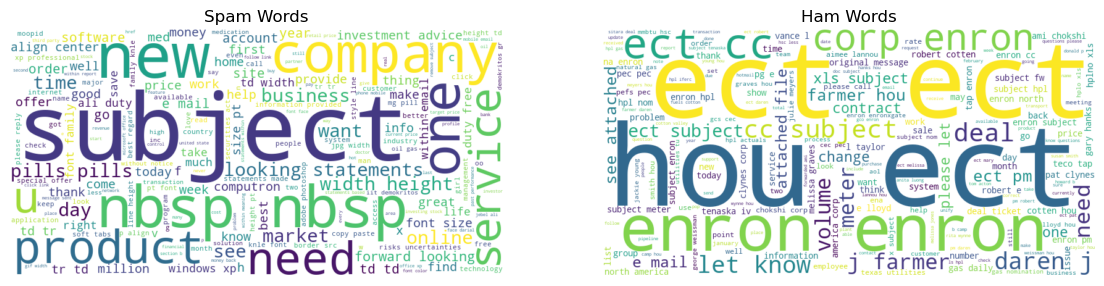

In [19]:

# Combine all spam and ham emails
spam_text = " ".join(df[df['label'] == 'spam']['clean_text'])
ham_text = " ".join(df[df['label'] == 'ham']['clean_text'])

# Generate word clouds
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

# Plot Word Clouds
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Spam Words')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Ham Words')

plt.show()
